In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


In [4]:
"""
SibSp : 동행 형제 또는 배우자 수
Parch : 동행 부모 또는 자녀 수
Embarked : C=Cherbourg , Q=Queenstown, S=Southhamton
"""


'\nSibSp : 동행 형제 또는 배우자 수\nParch : 동행 부모 또는 자녀 수\nEmbarked : C=Cherbourg , Q=Queenstown, S=Southhamton\n'

In [5]:
train.isnull().sum()
# isnull 확인 결과 Age, Cabin,  Embarked 가 다수 빠져있음

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:

def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts() #train csv 에서 survived 값이 1 인 feature 값을 모두 세줘!
    dead =  train[train['Survived']==0][feature].value_counts() #마찬가지로 survived 값이 0 인 값 모두 세줘!
    df = pd.DataFrame([survived,dead])
    df.index=['Survived',"Dead"]
    df.plot(kind='bar',stacked=True,figsize=(10,5))


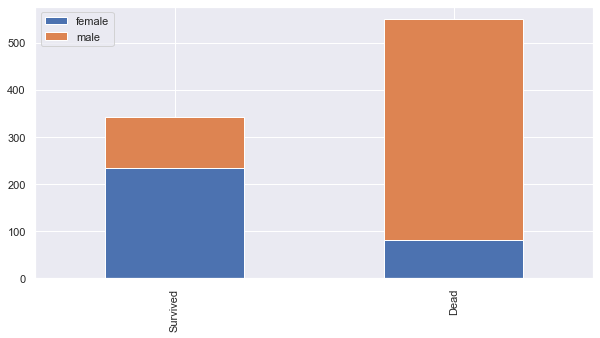

In [7]:
bar_chart('Sex')

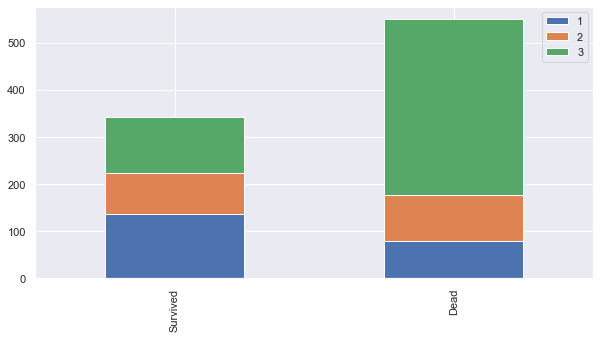

In [8]:
bar_chart('Pclass')

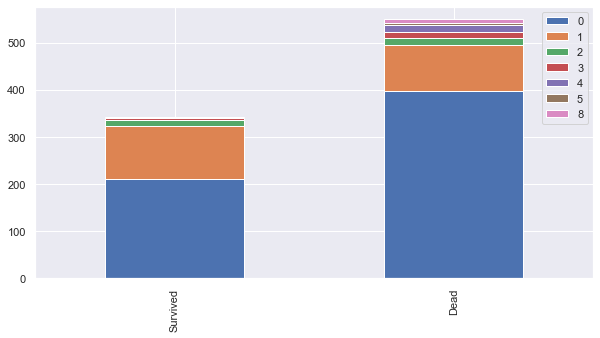

In [9]:
bar_chart('SibSp')

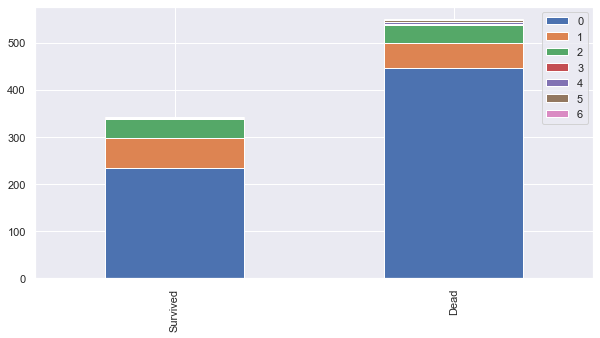

In [10]:
bar_chart('Parch')

In [11]:
train_test_data  = [train,test]

for dataset in  train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [12]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Jonkheer      1
Countess      1
Sir           1
Ms            1
Capt          1
Don           1
Lady          1
Name: Title, dtype: int64

In [13]:
for dataset  in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady','Capt','Col','Countess','Don','Dona','Dr','Jonkheer','Major','Sir'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
title_mapping = {'Mr':0,'Master':0.4,'Rev':0.8,'Miss':1.2,'Mrs':1.6,'Rare':2}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
# for dataset  in train_test_data:
#     dataset['Title'] = dataset['Title'].replace(['Mlle','Ms','Mme','Master','Lady','Capt','Col','Countess','Don','Dr','Jonkheer','Major','Sir','Rev'],'Rare')

# title_mapping = {'Mr':0,'Miss':1,'Mrs':2,'Rare':3}
# for dataset in train_test_data:
#     dataset['Title'] = dataset['Title'].map(title_mapping)

In [14]:
train['Title'].value_counts()

0.0    517
1.2    185
1.6    126
0.4     40
2.0     17
0.8      6
Name: Title, dtype: int64

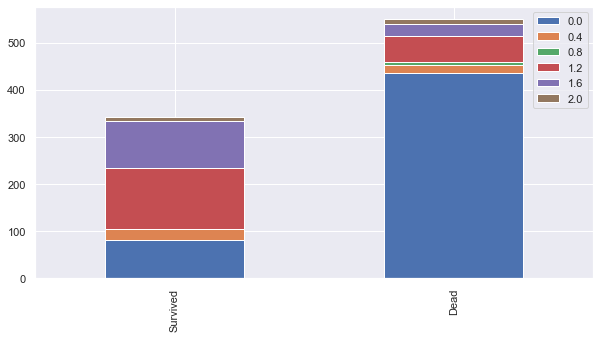

In [15]:
bar_chart('Title')

In [16]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [17]:
for dataset  in train_test_data:
    dataset['Sex'] = dataset['Sex'].replace('male',0)
    dataset['Sex'] = dataset['Sex'].replace('female',1)

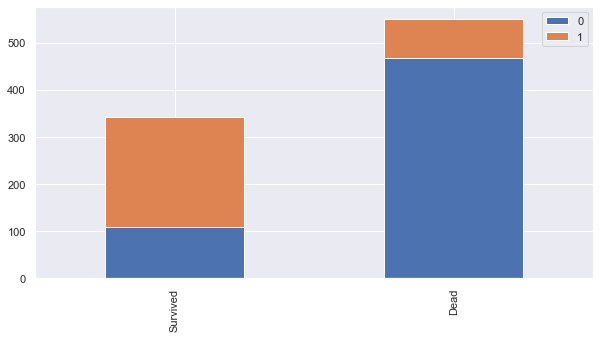

In [18]:
bar_chart('Sex')

In [19]:
#  Age 값의 NAN 값을 채워줘야 함! 그 값은 각 Title 별로 평균나이를 써주는게 가장 좋을것.
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

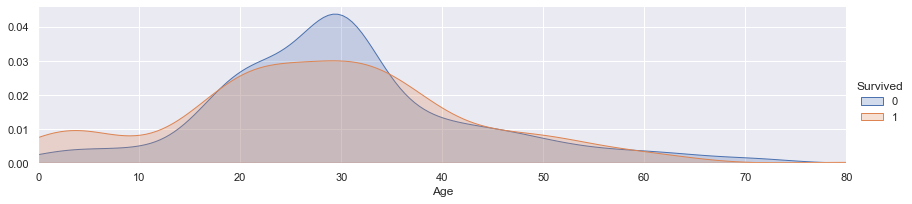

In [20]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

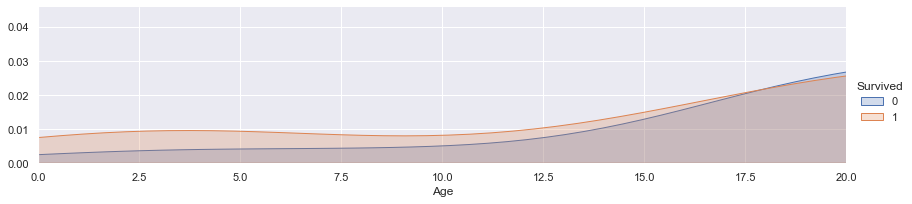

In [21]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(0,20)

(20.0, 30.0)

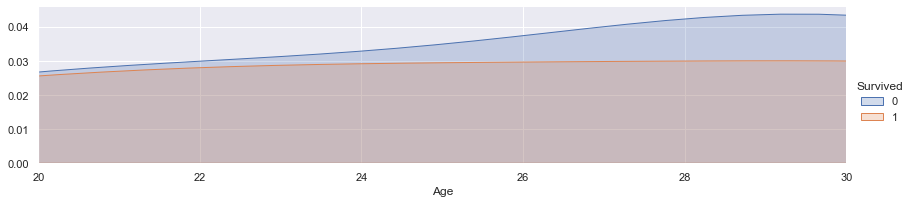

In [22]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(20,30)

(30.0, 40.0)

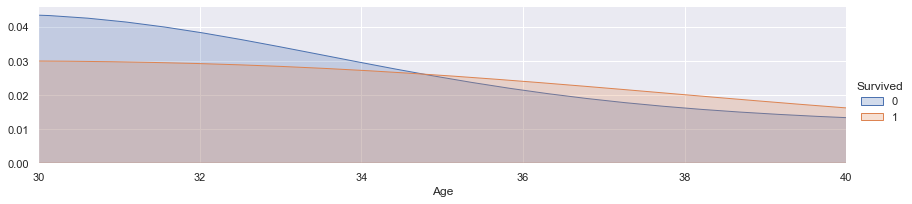

In [23]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(30,40)

(40.0, 60.0)

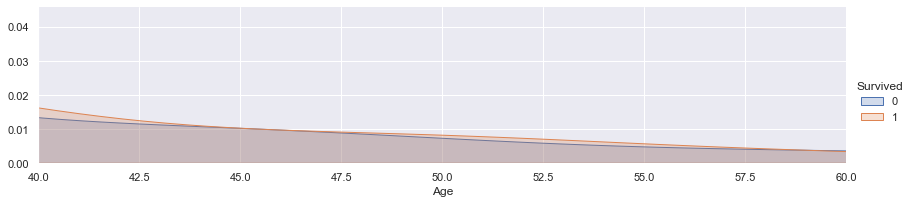

In [24]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(40,60)

In [25]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

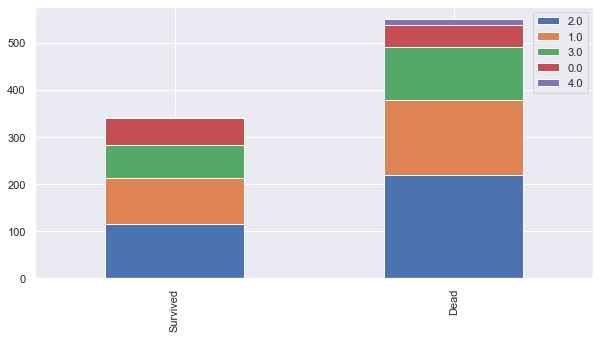

In [26]:
bar_chart('Age')

'\nS, C, Q 에 사는 사람들이 그곳에 거주해서 사망하고 죽은것이 아니라\n만약 S 라는 도시에 부자가 많이 살 경우 좋은 객실에 탑승했을 것이고\n따라서 그 생존률도 올라갔을 것이다\n그 인과관계의 확인을 위해서 탑승지에 대한 비교를 해보자\n'

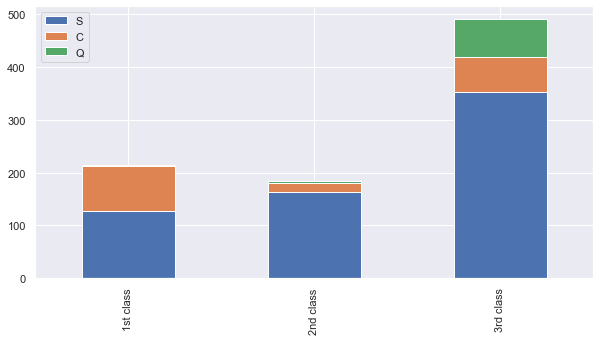

In [27]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df= pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))
"""
S, C, Q 에 사는 사람들이 그곳에 거주해서 사망하고 죽은것이 아니라
만약 S 라는 도시에 부자가 많이 살 경우 좋은 객실에 탑승했을 것이고
따라서 그 생존률도 올라갔을 것이다
그 인과관계의 확인을 위해서 탑승지에 대한 비교를 해보자
"""

In [28]:
# S 에서 탑승한 승객이 모든 객실을 통틀어서 50% 이상이기때문에 Embarked 값이 NAN 인 경우 S 를 넣어도 무방할 것
for dataset in train_test_data:
    dataset["Embarked"]=dataset['Embarked'].fillna('S')

embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [29]:
train.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,1.6
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.2
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,1.6
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0.0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0.0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0.0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,0.4
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,1.6
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,1.6


In [30]:
"""
train data 에서는 fare 의 nan 값이 없지만 test 의 경우 있다. 이 값또한 채워주면 조금이나마 높은 예측값을 얻는다
fare 의 값은 Pclass 와 높은 상관관계가 있을것이다. 또한 test 의 Pclass 값은 빠진 값이 없으므로, Pclass 값과의
상관관계 확인을 통해 test 의 fare NAN 값을 채워주자
"""

train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)
# csv 의 Fare 값 na 를 csv 의 Pclass 값을 groupby 해서 그룹 별 Fare값 중 평균값을 채워준다.

In [31]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

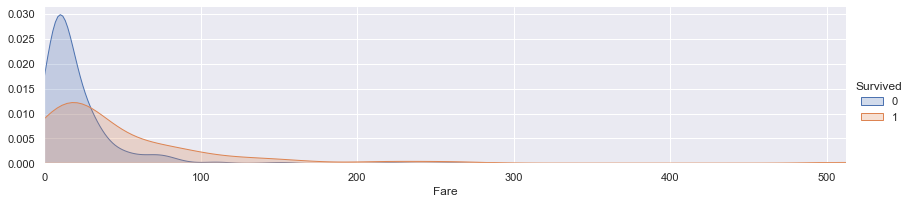

In [32]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

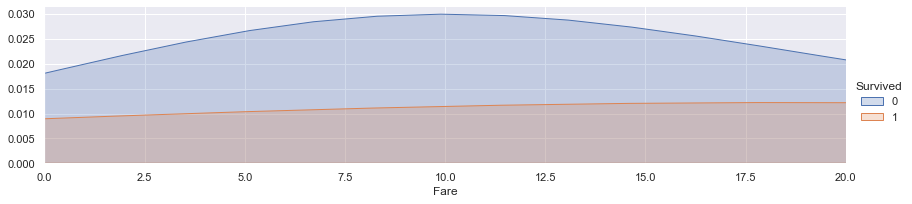

In [33]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

(0.0, 30.0)

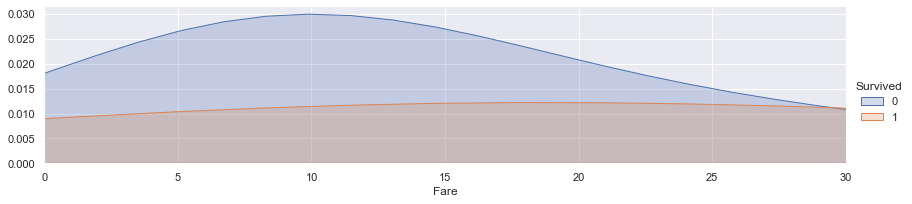

In [34]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

In [35]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [36]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
C22 C26        3
              ..
D15            1
D46            1
D6             1
B41            1
C85            1
Name: Cabin, Length: 147, dtype: int64

In [37]:
for dataset in train_test_data:
    dataset['Cabin'] =dataset['Cabin'].str[:1]

<AxesSubplot:>

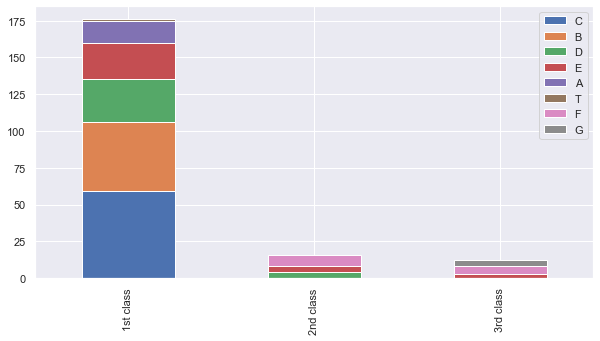

In [38]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df= pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))
# Pclass 에 대한 Cabin 값을 카운트해서 도표화했음


In [39]:
cabin_mapping = {'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)



# cabin mapping 에서 1,2,3 이 아닌 소수점으로 준 이유는 feature scaling 때문!
# machine learning Tool 을 사용할 경우 위와같이 변수를 숫자로 변환해서 그 차이를 통해 예측함
# 하지만 female 과 male 의 경우 0 과 1 의 차이를 보이지만, 위를 8까지 늘려서 T 의경우 8 로 변환할 경우
# female 과 male 의 차이로 인한 생존률은 엄청난 차이를 보이지만, A 와 T 의 차이는 그렇지 않을것이기때문에
# 부정확한 예측값으로 이어짐. 따라서 각 값의 편차를 소수점으로 줄여서 변환하는것으로 보충이 가능함


In [40]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

778

In [41]:
train['FamilySize'] = train['SibSp']+train['Parch'] + 1
test['FamilySize'] = test['SibSp']+test['Parch'] + 1

# 결국은 동행한 사람의 수 // 혼자탔는지, 또는 같이탔는지만 알면 된다고 판단
# 따라서 SibSp 와 Parch 값을 더해서 동행이 있는지 없는지 여부를 판단해보겠음


C:\Python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


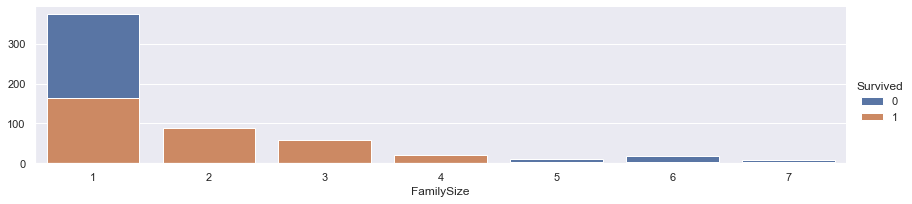

In [42]:
# def facet(variable):
#     facet = sns.FacetGrid(train,hue='Survived',aspect=4)
#     facet.map(sns.kdeplot,variable,shade=True)
#     facet.set(xlim=(0,train[variable].max()))
#     facet.add_legend()

# facet('FamilySize')
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.countplot,'FamilySize')
# facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()
# plt.xlim(0)


In [43]:
pd.crosstab(train['FamilySize'],train['Survived'])
# familysize 가 1명일 때 사망한 경우가 월등히 많았다
# 이와같이 확연한 차이를 보이는 데이터의 경우 충분히 중요한 데이터임
# 가족이 있을 때 빠르게 정보를 캐치해서 탈출했을 수도 있고,단순히 1명 탄 승객이 많아서 많이 생존한 것일수도 있음
# 하지만 확실한 것은 나머지 사이즈의 승객들이 비슷한 수준의 생존률로 수렴하는것에 비해 1의 승객은 2배의 차이가 나는게 우연은 아닐 것


Survived,0,1
FamilySize,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


In [44]:
family_mapping={1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6,11:4}
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)

In [45]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,1.6,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.2,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,1.6,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0.0,0.0
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0.0,0.0
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,0.4,1.6
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,1.6,0.8
9,10,1,2,1,0.0,1,0,237736,2.0,1.8,1,1.6,0.4


In [46]:
feature_drop = ['Ticket','SibSp','Parch']
train=train.drop(feature_drop,axis=1)
test=test.drop(feature_drop,axis=1)
train=train.drop(['PassengerId'],axis=1) # train의 passengerid 만 삭제하는 이유는 test에서는 채점을 위해 몇번 승객이 생존했는지가 중요하기 때문


In [47]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train_data.shape,target.shape

((891, 8), (891,))

In [48]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,3.0,2.0,0.8,1,1.6,0.4
2,3,1,1.0,0.0,2.0,0,1.2,0.0
3,1,1,2.0,2.0,0.8,0,1.6,0.4
4,3,0,2.0,0.0,2.0,0,0.0,0.0
5,3,0,2.0,0.0,2.0,2,0.0,0.0
6,1,0,3.0,2.0,1.6,0,0.0,0.0
7,3,0,0.0,1.0,2.0,0,0.4,1.6
8,3,1,2.0,0.0,2.0,0,1.6,0.8
9,2,1,0.0,2.0,1.8,1,1.6,0.4


KNN : 주변에 있는 인자들을 비교해서 값을 예측 ( 주변 사람 {k=3} 3명 중 2명이 죽고 1명이 살았다 -> answer : 죽었을것이다. {k=5} 5명 중에서 생존여부 추려내기 ) K 값에 따라 주변 인자개수 변화

decision tree : 각자의 feature 가 가진 조건들을 확인한 후 가장 높은 확률을 나타내줌 ( 남자인가? Y/N -> 가족이있는가? Y/N ->  .... )

random forest : 랜덤한 3개정도의 조건문을 체크하여 ({남자인가? Y/N} , {티켓가격이 비싼편인가? Y/N}, {1등석에 타고있는가? Y/N}) 를 통해 만약 dead 값이 2개라면 dead 로 유추한다

Naive Bayes : 확률을 사용하는 방법 // 데이터를 학습시키고, 학습시킨 데이터를 통해서 확률을 통한 유추 ({심슨 : 35세 남자} 늙은 남자가 생존할 확률은 70%! )

SVM (support vector machine)) : 가장자리에 있는 두 결과값을 갈라주는 decision vector 를 그린 다음 그 벡터값을 기준으로 결과값을 유추한다



In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

import numpy as np 



In [50]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data,target,cv = k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.81111111 0.78651685 0.82022472 0.84269663 0.85393258 0.82022472
 0.83146067 0.7752809  0.84269663 0.82022472]


In [51]:
# kNN score 결과값
round(np.mean(score)*100,2)

82.04

In [52]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.76666667 0.79775281 0.76404494 0.7752809  0.8988764  0.7752809
 0.83146067 0.82022472 0.75280899 0.79775281]


In [53]:
# Decision tree Score 결과값
round(np.mean(score)*100,2)

79.8

In [54]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.77777778 0.82022472 0.78651685 0.76404494 0.85393258 0.82022472
 0.82022472 0.83146067 0.74157303 0.82022472]


In [55]:
# Random Forest Score 결과값
round(np.mean(score)*100,2)

80.36

In [56]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.83333333 0.74157303 0.75280899 0.70786517 0.68539326 0.78651685
 0.71910112 0.79775281 0.84269663 0.78651685]


In [57]:
# Naive Bayes Score 결과값
round(np.mean(score)*100,2)

76.54

In [58]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.8        0.79775281 0.79775281 0.78651685 0.83146067 0.79775281
 0.79775281 0.84269663 0.83146067 0.82022472]


In [59]:
# SVM 결과값
round(np.mean(score)*100,2)

81.03

Testing 방법

In [60]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [61]:
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(train_data,target)

test_data = test.drop('PassengerId',axis=1).copy()
prediction = clf.predict(test_data)

In [63]:
submission = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':prediction
})

submission.to_csv('submission.csv',index=False)

In [64]:
submission = pd.read_csv('submission.csv')
submission.head(30)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
